## CNN-FMNIST

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [24]:
import h5py
from os import listdir
from os.path import isfile, join

def get_results(exp_folder):
    
    
    onlyfiles = [f for f in listdir(f"./results/{exp_folder}") \
                 if isfile(join(f"./results/{exp_folder}", f))]
    glob_acc_lst = []
    train_loss_lst = []
    test_acc_lst = []
    test_loss_lst = []
    for file in onlyfiles:
        f = h5py.File(f'./results/{exp_folder}/{file}', 'r')
        glob_acc_lst.append(f['rs_glob_acc'][:])
        train_loss_lst.append(f['rs_train_loss'][:])
        test_loss_lst.append(f['rs_test_loss'][:])
        test_acc_lst.append(f['rs_test_acc'][:])
        f.close()
    return glob_acc_lst, train_loss_lst, test_acc_lst, test_loss_lst

MNIST_CNN_Sophia = get_results('fmnist-sophia')
# MNIST_CNN_DONE = get_results('Mnist_DONE')
MNIST_CNN_FedAvg = get_results('fmnist-fedavg')

sophia_test_loss = MNIST_CNN_Sophia[-1]
sophia_test_acc = MNIST_CNN_Sophia[-2]

# done_test_loss = MNIST_CNN_DONE[-1]
# done_test_acc = MNIST_CNN_DONE[-2]

fedavg_test_loss = MNIST_CNN_FedAvg[-1]
fedavg_test_acc = MNIST_CNN_FedAvg[-2]

In [25]:
def get_mu_std(lst):
    mu = np.array(lst).mean(axis=0)
    std = np.array(lst).std(axis=0)
    return mu, std

In [26]:
# mu/std for losses
mu_fedavg_losses, std_fedavg_losses = get_mu_std(fedavg_test_loss)
mu_sophia_losses, std_sophia_losses = get_mu_std(sophia_test_loss)
# mu_done_losses, std_done_losses = get_mu_std(done_test_loss)
# mu/std for accuracies
mu_fedavg_acc, std_fedavg_acc = get_mu_std(fedavg_test_acc)
mu_sophia_acc, std_sophia_acc = get_mu_std(sophia_test_acc)
# mu_done_acc, std_done_acc = get_mu_std(done_test_acc)



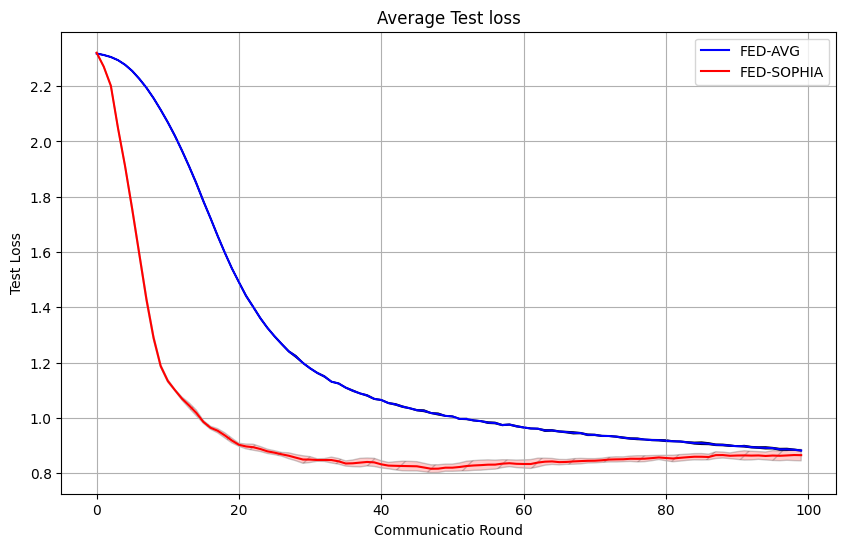

In [27]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the average line
ax.plot(mu_fedavg_losses, color='blue', label='FED-AVG')
ax.plot(mu_sophia_losses, color='red', label='FED-SOPHIA')
# ax.plot(mu_done_losses, color='blue', label='DONE')

ax.fill_between(range(len(mu_fedavg_losses)), mu_fedavg_losses - std_fedavg_losses,\
                mu_fedavg_losses + std_fedavg_losses, color='blue', \
                alpha=1, hatch='/', edgecolor='black')

ax.fill_between(range(len(mu_sophia_losses)), mu_sophia_losses - std_sophia_losses,\
                mu_sophia_losses + std_sophia_losses, color='red', \
                alpha=0.2, hatch='/', edgecolor='black')

# ax.fill_between(range(len(mu_done_losses)), mu_done_losses - std_done_losses,\
#                 mu_done_losses + std_done_losses, color='blue', \
#                 alpha=0.2)

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communicatio Round')
ax.set_ylabel('Test Loss')
ax.set_title('Average Test loss')
ax.legend()
ax.grid(True)
plt.savefig('test_losses_fmnist.png')
# Display the plot
plt.show()


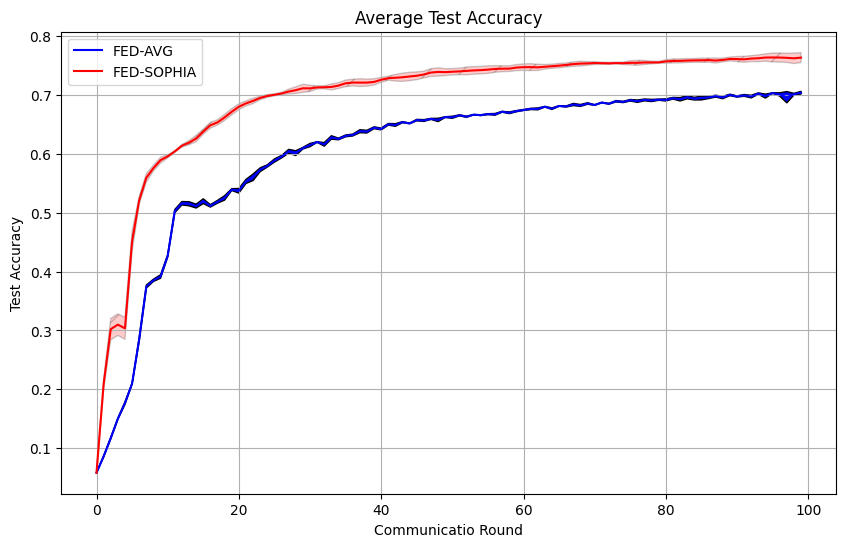

In [28]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the average line
ax.plot(mu_fedavg_acc, color='blue', label='FED-AVG')
ax.plot(mu_sophia_acc, color='red', label='FED-SOPHIA')
# ax.plot(mu_done_losses, color='blue', label='DONE')

ax.fill_between(range(len(mu_fedavg_acc)), mu_fedavg_acc - std_fedavg_acc,\
                mu_fedavg_acc + std_fedavg_acc, color='blue', \
                alpha=1, hatch='/', edgecolor='black')

ax.fill_between(range(len(mu_sophia_acc)), mu_sophia_acc - std_sophia_acc,\
                mu_sophia_acc + std_sophia_acc, color='red', \
                alpha=0.2, hatch='/', edgecolor='black')

# ax.fill_between(range(len(mu_done_acc)), mu_done_acc - std_done_acc,\
#                 mu_done_acc + std_done_acc, color='blue', \
#                 alpha=0.2)
# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communicatio Round')
ax.set_ylabel('Test Accuracy')
ax.set_title('Average Test Accuracy')
ax.legend()
ax.grid(True)
# save plot
plt.savefig('test_acc_fmnist.png')
# Display the plot
plt.show()


## CNN-MNIST

In [29]:
import h5py
from os import listdir
from os.path import isfile, join

MNIST_CNN_Sophia = get_results('mnist-sophia')
# MNIST_CNN_DONE = get_results('Mnist_DONE')
MNIST_CNN_FedAvg = get_results('mnist-fedavg')

sophia_test_loss = MNIST_CNN_Sophia[-1]
sophia_test_acc = MNIST_CNN_Sophia[-2]

# done_test_loss = MNIST_CNN_DONE[-1]
# done_test_acc = MNIST_CNN_DONE[-2]

fedavg_test_loss = MNIST_CNN_FedAvg[-1]
fedavg_test_acc = MNIST_CNN_FedAvg[-2]

In [30]:
# mu/std for losses
mu_fedavg_losses, std_fedavg_losses = get_mu_std(fedavg_test_loss)
mu_sophia_losses, std_sophia_losses = get_mu_std(sophia_test_loss)
# mu_done_losses, std_done_losses = get_mu_std(done_test_loss)
# mu/std for accuracies
mu_fedavg_acc, std_fedavg_acc = get_mu_std(fedavg_test_acc)
mu_sophia_acc, std_sophia_acc = get_mu_std(sophia_test_acc)
# mu_done_acc, std_done_acc = get_mu_std(done_test_acc)



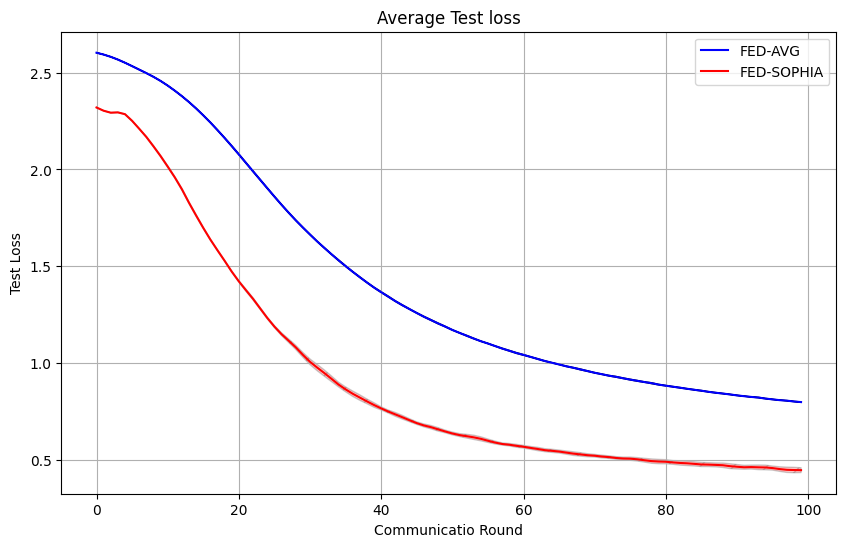

In [31]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the average line
ax.plot(mu_fedavg_losses, color='blue', label='FED-AVG')
ax.plot(mu_sophia_losses, color='red', label='FED-SOPHIA')
# ax.plot(mu_done_losses, color='blue', label='DONE')

ax.fill_between(range(len(mu_fedavg_losses)), mu_fedavg_losses - std_fedavg_losses,\
                mu_fedavg_losses + std_fedavg_losses, color='blue', \
                alpha=1, hatch='/', edgecolor='black')

ax.fill_between(range(len(mu_sophia_losses)), mu_sophia_losses - std_sophia_losses,\
                mu_sophia_losses + std_sophia_losses, color='red', \
                alpha=0.2, hatch='/', edgecolor='black')

# ax.fill_between(range(len(mu_done_losses)), mu_done_losses - std_done_losses,\
#                 mu_done_losses + std_done_losses, color='blue', \
#                 alpha=0.2)

# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communicatio Round')
ax.set_ylabel('Test Loss')
ax.set_title('Average Test loss')
ax.legend()
ax.grid(True)
plt.savefig('test_losses_mnist.png')
# Display the plot
plt.show()


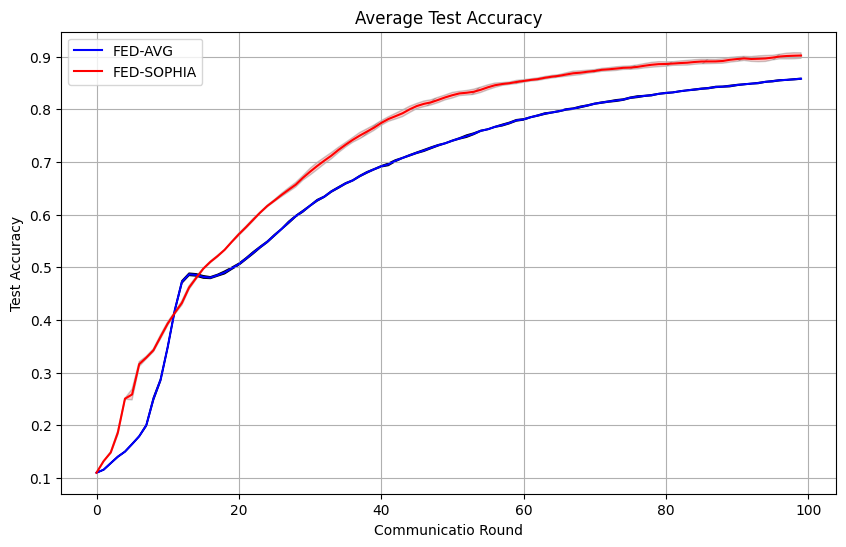

In [32]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the average line
ax.plot(mu_fedavg_acc, color='blue', label='FED-AVG')
ax.plot(mu_sophia_acc, color='red', label='FED-SOPHIA')
# ax.plot(mu_done_losses, color='blue', label='DONE')

ax.fill_between(range(len(mu_fedavg_acc)), mu_fedavg_acc - std_fedavg_acc,\
                mu_fedavg_acc + std_fedavg_acc, color='blue', \
                alpha=1, hatch='/', edgecolor='black')

ax.fill_between(range(len(mu_sophia_acc)), mu_sophia_acc - std_sophia_acc,\
                mu_sophia_acc + std_sophia_acc, color='red', \
                alpha=0.2, hatch='/', edgecolor='black')

# ax.fill_between(range(len(mu_done_acc)), mu_done_acc - std_done_acc,\
#                 mu_done_acc + std_done_acc, color='blue', \
#                 alpha=0.2)
# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communicatio Round')
ax.set_ylabel('Test Accuracy')
ax.set_title('Average Test Accuracy')
ax.legend()
ax.grid(True)
# save plot
plt.savefig('test_acc_mnist.png')
# Display the plot
plt.show()


## LR effect

In [33]:
MNIST_CNN_Sophia = get_results('fmnist-sophia')
# MNIST_CNN_DONE = get_results('Mnist_DONE')
MNIST_CNN_FedAvg = get_results('fmnist-fedavg')
MNIST_CNN_Sophia_LR = get_results('lr')

sophia_test_loss = MNIST_CNN_Sophia[-1]
sophia_test_acc = MNIST_CNN_Sophia[-2]

sophia_test_loss_lrs = MNIST_CNN_Sophia_LR[-1]
sophia_test_acc_lrs = MNIST_CNN_Sophia_LR[-2]

# done_test_loss = MNIST_CNN_DONE[-1]
# done_test_acc = MNIST_CNN_DONE[-2]

fedavg_test_loss = MNIST_CNN_FedAvg[-1]
fedavg_test_acc = MNIST_CNN_FedAvg[-2]

In [35]:
# mu/std for losses
mu_fedavg_losses, std_fedavg_losses = get_mu_std(fedavg_test_loss)
mu_sophia_losses, std_sophia_losses = get_mu_std(sophia_test_loss)
# mu_done_losses, std_done_losses = get_mu_std(done_test_loss)
# mu/std for accuracies
mu_fedavg_acc, std_fedavg_acc = get_mu_std(fedavg_test_acc)
mu_sophia_acc, std_sophia_acc = get_mu_std(sophia_test_acc)
# mu_done_acc, std_done_acc = get_mu_std(done_test_acc)



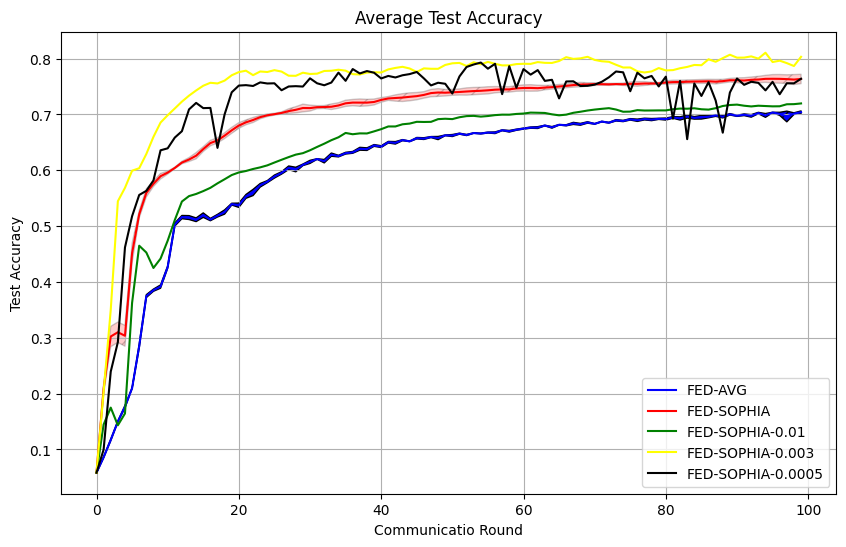

In [38]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the average line
ax.plot(mu_fedavg_acc, color='blue', label='FED-AVG')
ax.plot(mu_sophia_acc, color='red', label='FED-SOPHIA')
ax.plot(sophia_test_acc_lrs[0], color='green', label='FED-SOPHIA-0.01')
ax.plot(sophia_test_acc_lrs[1], color='yellow', label='FED-SOPHIA-0.003')
ax.plot(sophia_test_acc_lrs[2], color='black', label='FED-SOPHIA-0.0005')
# ax.plot(mu_done_losses, color='blue', label='DONE')

ax.fill_between(range(len(mu_fedavg_acc)), mu_fedavg_acc - std_fedavg_acc,\
                mu_fedavg_acc + std_fedavg_acc, color='blue', \
                alpha=1, hatch='/', edgecolor='black')

ax.fill_between(range(len(mu_sophia_acc)), mu_sophia_acc - std_sophia_acc,\
                mu_sophia_acc + std_sophia_acc, color='red', \
                alpha=0.2, hatch='/', edgecolor='black')


# ax.fill_between(range(len(mu_done_acc)), mu_done_acc - std_done_acc,\
#                 mu_done_acc + std_done_acc, color='blue', \
#                 alpha=0.2)
# Customize your plot (e.g., labels, titles, etc.)
ax.set_xlabel('Communicatio Round')
ax.set_ylabel('Test Accuracy')
ax.set_title('Average Test Accuracy')
ax.legend()
ax.grid(True)
# save plot
plt.savefig('test_acc_mnist.png')
# Display the plot
plt.show()
